Para visualizar una red multicapa de la forma que muestra la imagen utilizando networkx y PyVis, puedes seguir estos pasos:
1. Crear la estructura de red multicapa en NetworkX:

NetworkX no tiene una clase predeterminada para redes multicapa, pero puedes modelarlas usando un enfoque de etiquetas o capas. Aquí, las capas estarán representadas por grafos distintos que comparten nodos y enlaces entre capas.

In [1]:
import networkx as nx

# Crear grafos para cada capa
layer1 = nx.Graph()
layer2 = nx.Graph()

# Añadir nodos y conexiones en la capa 1
layer1.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])

# Añadir nodos y conexiones en la capa 2
layer2.add_edges_from([(1, 3), (1, 4), (3, 4)])

# Crear un grafo completo para la red multicapa
multilayer_graph = nx.Graph()

# Añadir los nodos y aristas de ambas capas con etiquetas de capa
for node in layer1.nodes():
    multilayer_graph.add_node(f"Layer1_{node}", layer='Layer 1')
    multilayer_graph.add_node(f"Layer2_{node}", layer='Layer 2')

# Añadir las aristas internas de cada capa
for edge in layer1.edges():
    multilayer_graph.add_edge(f"Layer1_{edge[0]}", f"Layer1_{edge[1]}")

for edge in layer2.edges():
    multilayer_graph.add_edge(f"Layer2_{edge[0]}", f"Layer2_{edge[1]}")

# Añadir aristas entre capas (conexiones verticales entre nodos)
for node in layer1.nodes():
    multilayer_graph.add_edge(f"Layer1_{node}", f"Layer2_{node}")


2. Visualizar la red multicapa con PyVis:

Para visualizar la red de una manera interactiva y similar a la imagen que subiste, puedes usar PyVis para generar una visualización en la web.

In [2]:
from pyvis.network import Network

# Crear el objeto Network con PyVis
net = Network(height="750px", width="100%", notebook=True)

# Añadir nodos con posiciones para simular capas
for node in multilayer_graph.nodes(data=True):
    if node[1]['layer'] == 'Layer 1':
        net.add_node(node[0], label=node[0], physics=False, x=0, y=100 * int(node[0].split('_')[1]))
    elif node[1]['layer'] == 'Layer 2':
        net.add_node(node[0], label=node[0], physics=False, x=300, y=100 * int(node[0].split('_')[1]))

# Añadir las aristas
for edge in multilayer_graph.edges():
    net.add_edge(edge[0], edge[1])

# Mostrar la red interactiva
net.show("multilayer_network.html")


multilayer_network.html


Explicación:

    networkx: Crea dos grafos que representan cada capa de la red. Los nodos en ambas capas comparten etiquetas, lo que permite que se conecten verticalmente entre capas.

    PyVis: Define una visualización interactiva donde los nodos de las capas se distribuyen en diferentes posiciones horizontales (x), mientras que las conexiones internas se conservan, junto con las conexiones entre capas.

Esto te permitirá visualizar la red multicapa con un formato similar al diagrama que has proporcionado.

Gracias, me gustó tu enfoque, ¿como podríamos añadir los rectángulos o paralelogramos parecidos a la imagen que te compartí para indicar que son 2 redes distintas?
ChatGPT said:
ChatGPT

Para añadir rectángulos o paralelogramos que representen las dos capas de la red en la visualización, puedes usar pyvis, pero PyVis no tiene soporte nativo para formas como rectángulos. Sin embargo, hay algunas estrategias que podemos usar para lograr un efecto visual similar. Una opción sería usar "nodos invisibles" que definan las esquinas de los rectángulos y luego utilizar aristas sin color para conectar estas esquinas, creando el contorno de los rectángulos.

Aquí te dejo un enfoque detallado para simular los rectángulos de las dos capas en la visualización de PyVis:
1. Añadir nodos invisibles para las esquinas de los rectángulos:

Podemos definir nodos adicionales que actuarán como las esquinas de los rectángulos que representarán las dos capas. Estos nodos no se visualizarán, pero se colocarán de tal forma que las conexiones entre ellos formen un marco rectangular alrededor de los nodos de cada capa.
2. Conectar las esquinas con aristas invisibles:

Luego conectamos las esquinas con aristas que tampoco se mostrarán (puedes definir las aristas con un color transparente).
Código actualizado:

In [19]:
from pyvis.network import Network
import networkx as nx

# Crear grafos para cada capa
layer1 = nx.Graph()
layer2 = nx.Graph()

# Añadir nodos y conexiones en la capa 1
layer1.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)])

# Añadir nodos y conexiones en la capa 2
layer2.add_edges_from([(1, 3), (1, 4), (3, 4), (2, 1)])

# Crear un grafo completo para la red multicapa
multilayer_graph = nx.Graph()

# Añadir los nodos y aristas de ambas capas con etiquetas de capa
for node in layer1.nodes():
    multilayer_graph.add_node(f"Layer1_{node}", layer='Layer 1')
    multilayer_graph.add_node(f"Layer2_{node}", layer='Layer 2')

# Añadir las aristas internas de cada capa
for edge in layer1.edges():
    multilayer_graph.add_edge(f"Layer1_{edge[0]}", f"Layer1_{edge[1]}")

for edge in layer2.edges():
    multilayer_graph.add_edge(f"Layer2_{edge[0]}", f"Layer2_{edge[1]}")

# Crear el objeto Network con PyVis
net = Network(height="750px", width="100%", notebook=True)

# Aplicar spring layout para obtener posiciones más naturales en cada capa
# Centramos la capa 1 en la parte superior (eje y positivo) y la capa 2 en la parte inferior (eje y negativo)
pos_layer1 = nx.spring_layout(layer1, scale=.1, center=(0, .1))  # Capa 1 (arriba)
pos_layer2 = nx.spring_layout(layer2, scale=.1, center=(0, -.1))  # Capa 2 (abajo)

# Añadir nodos de la capa 1 con posiciones del layout
for node, pos in pos_layer1.items():
    net.add_node(f"Layer1_{node}", label=f"Layer1_{node}", physics=False, x=pos[0]*1000, y=pos[1]*1000,)

# Añadir nodos de la capa 2 con posiciones del layout
for node, pos in pos_layer2.items():
    net.add_node(f"Layer2_{node}", label=f"Layer2_{node}", physics=False, x=pos[0]*1000, y=pos[1]*1000, )

# Añadir las aristas internas de cada capa (líneas sólidas)
for edge in layer1.edges():
    net.add_edge(f"Layer1_{edge[0]}", f"Layer1_{edge[1]}")
for edge in layer2.edges():
    net.add_edge(f"Layer2_{edge[0]}", f"Layer2_{edge[1]}")

# Añadir aristas punteadas entre capas (Layer1 -> Layer2)
for node in layer1.nodes():
    net.add_edge(f"Layer1_{node}", f"Layer2_{node}", dashes=True)

# Mostrar la red interactiva
net.show("multilayer_network_vertical_layout.html")


multilayer_network_vertical_layout.html


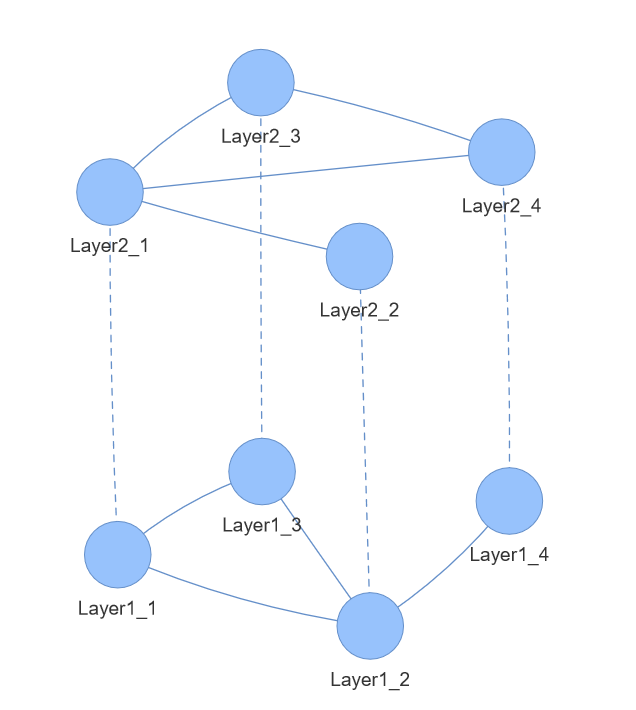

In [16]:
from pyvis.network import Network
import networkx as nx

def create_aligned_multilayer_network(layer1, layer2, layer1_name="Layer1", layer2_name="Layer2"):
    """
    Create a multilayer network visualization with perfectly aligned nodes between layers
    and straight vertical inter-layer connections.
    
    Args:
        layer1_edges: List of tuples representing edges in layer 1
        layer2_edges: List of tuples representing edges in layer 2
        layer1_name: Name for layer 1 (default: "Layer1")
        layer2_name: Name for layer 2 (default: "Layer2")
    """
    # Create graphs for each layer
    layer1 =  nx.barabasi_albert_graph(50, 1, seed=23)
    layer2 =  nx.barabasi_albert_graph(50, 1, seed=23)
    
    # Create PyVis network
    net = Network(height="100vh", width="100%", notebook=True )
    
    # Calculate layout once and use it for both layers
    base_layout = nx.kamada_kawai_layout(layer1)
    
    # Vertical separation between layers
    y_offset = 60
    
    # Add nodes for layer 1 (top layer)
    for node, pos in base_layout.items():
        net.add_node(
                    f"{layer1_name}_{node}",
                    #label=f"{layer1_name}_{node}",
                    x=pos[0]*100,
                    y=pos[1]*40 + y_offset,
                    color="#9FA3D5",
                    size=3,
                    borderWidth=0,
                    physics=False
                    #,title=f"Node {node} in {layer1_name}"
                    )
    
    # Add nodes for layer 2 (bottom layer)
    for node, pos in base_layout.items():
        net.add_node(
                    f"{layer2_name}_{node}",
                    #label=f"{layer2_name}_{node}",
                    x=pos[0]*100,
                    y=pos[1]*40 - y_offset,
                    color="#3B4285",
                    size=3,
                    borderWidth=0,
                    physics=False
                    #,title=f"Node {node} in {layer2_name}"
                    )
    
    # Add intra-layer edges
    for edge in layer1.edges():
        net.add_edge(
                    f"{layer1_name}_{edge[0]}",
                    f"{layer1_name}_{edge[1]}",
                    color="#3B4285",
                    width=.8,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    for edge in layer2.edges():
        net.add_edge(
                    f"{layer2_name}_{edge[0]}",
                    f"{layer2_name}_{edge[1]}",
                    color="#9FA3D5",
                    width=.8,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    # Add straight inter-layer edges
    for node in layer1.nodes():
        net.add_edge(
                    f"{layer1_name}_{node}",
                    f"{layer2_name}_{node}",
                    dashes=True,
                    color="#E0E3F4",
                    width=.5,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    # Set network-wide options
    net.set_options("""
    const options = {
      "physics": {
        "enabled": false
      },
      "edges": {
        "smooth": {
          "enabled": false
        }
      },
      "nodes": {
          "font": {
              "size": 0
          }
      }
    }
    """)
    
    return net

# # Ejemplo de uso
layer1_edges = [(1, 2), (1, 3), (2, 3), (2, 4)]
layer2_edges = [(1, 3), (1, 4), (3, 4), (2, 1)]

# Crear y mostrar la red
net = create_aligned_multilayer_network(layer1_edges, layer2_edges)
net.show("aligned_multilayer_network.html")

aligned_multilayer_network.html


In [15]:
def visualizacionMulticapa(red_amistad, red_poder, capa_amistad="Amistad", capa_poder="Poder"):
    """
    Se crea una función para visualizar 2 redes en multicapaa
    """
    # Create graphs for each layer
    red_amistad =  nx.barabasi_albert_graph(50, 1, seed=23)
    red_poder =  nx.barabasi_albert_graph(50, 1, seed=23)
    
    # Se crea la red en PyVis
    net = Network(height="100vh", width="100%", notebook=True )
    
    # Se escoge un estilo de visualización en las redes y se aplica para ambas capas
    disposicionRed = nx.kamada_kawai_layout(red_amistad)
    
    # Separación vertical entre capas
    separacionEnY = 60
    
    # Se añaden los nodos para la primera capa (amistad)
    for node, pos in disposicionRed.items():
        net.add_node(
                    f"{capa_amistad}_{node}",
                    #label=f"{layer2_name}_{node}",
                    x=pos[0]*100,
                    y=pos[1]*40 - separacionEnY,
                    color="#9FA3D5",
                    size=3,
                    borderWidth=0,
                    physics=False
                    
                    )
    
    # Se añaden los nodos para la segunda (capa de poder) 
    for node, pos in base_layout.items():
        net.add_node(
                    f"{capa_poder}_{node}",
                    #label=f"{layer2_name}_{node}",
                    x=pos[0]*100,
                    y=pos[1]*40 - separacionEnY,
                    color="#3B4285",
                    size=3,
                    borderWidth=0,
                    physics=False
                    
                    )
    
    # Se añaden los enlaces entre capas
    for edge in red_amistad.edges():
        net.add_edge(
                    f"{capa_amistad}_{edge[0]}",
                    f"{capa_amistad}_{edge[1]}",
                    color="#3B4285",
                    width=.8,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    for edge in layer2.edges():
        net.add_edge(
                    f"{capa_poder}_{edge[0]}",
                    f"{capa_poder}_{edge[1]}",
                    color="#9FA3D5",
                    width=.8,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    # Add straight inter-layer edges
    for node in layer1.nodes():
        net.add_edge(
                    f"{capa_amistad}_{node}",
                    f"{capa_poder}_{node}",
                    dashes=True,
                    color="#E0E3F4",
                    width=.5,
                    smooth={'type': 'continuous',
                           'enabled': False})
    
    # Set network-wide options
    net.set_options("""
    const options = {
      "physics": {
        "enabled": false
      },
      "edges": {
        "smooth": {
          "enabled": false
        }
      },
      "nodes": {
          "font": {
              "size": 0
          }
      }
    }
    """)
    
    return net

# Create graphs for each layer
red_amistad =  nx.barabasi_albert_graph(50, 1, seed=23)
red_poder =  nx.barabasi_albert_graph(50, 1, seed=23)

# Crear y mostrar la red
net = visualizacionMulticapa (red_amistad, red_poder)
net.show("visualizacionMulticapa.html")

NameError: name 'base_layout' is not defined

Este modelo es el más completo y funciona bien:

In [18]:
from pyvis.network import Network
import networkx as nx

def create_aligned_multilayer_network(layer1, layer2, layer1_name="Layer1", layer2_name="Layer2"):
    """
    Crea una visualización de red multicapa con nodos perfectamente alineados entre capas
    y conexiones verticales rectas entre capas.
    """
    # Crear red PyVis
    net = Network(height="100vh", width="100%", notebook=True)
    
    # Calcular el layout una vez y usarlo para ambas capas
    base_layout = nx.kamada_kawai_layout(layer1)
    
    # Separación vertical entre capas
    y_offset = 60
    
    # Añadir nodos para ambas capas
    for node, pos in base_layout.items():
        net.add_node(
            f"{layer1_name}_{node}",
            x=pos[0] * 100,
            y=pos[1] * 40 + y_offset,
            color="#9FA3D5",
            size=3,
            borderWidth=0,
            physics=False
        )
        net.add_node(
            f"{layer2_name}_{node}",
            x=pos[0] * 100,
            y=pos[1] * 40 - y_offset,
            color="#3B4285",
            size=3,
            borderWidth=0,
            physics=False
        )
    
    # Añadir enlaces intra-capa
    for edge in layer1.edges():
        source, target = edge
        net.add_edge(
            f"{layer1_name}_{source}",
            f"{layer1_name}_{target}",
            color="#3B4285",
            width=0.8,
            smooth={"type": "continuous", "enabled": False}
        )
        net.add_edge(
            f"{layer2_name}_{source}",
            f"{layer2_name}_{target}",
            color="#9FA3D5",
            width=0.8,
            smooth={"type": "continuous", "enabled": False}
        )
    
    # Añadir enlaces rectos entre capas
    for node in layer1.nodes():
        net.add_edge(
            f"{layer1_name}_{node}",
            f"{layer2_name}_{node}",
            dashes=True,
            color="#E0E3F4",
            width=0.5,
            smooth={"type": "continuous", "enabled": False}
        )
    
    # Configurar opciones de la red
    net.set_options("""
    {
        "physics": {
            "enabled": false
        },
        "edges": {
            "smooth": {
                "enabled": false
            }
        },
        "nodes": {
            "font": {
                "size": 0
            }
        }
    }
    """)
    
    return net

# Ejemplo de uso
layer1 = nx.barabasi_albert_graph(50, 1, seed=23)
layer2 = nx.barabasi_albert_graph(50, 1, seed=23)

# Crear y mostrar la red
net = create_aligned_multilayer_network(layer1, layer2)
net.show("aligned_multilayer_network.html")

aligned_multilayer_network.html


Se intenta aumentar el tamaño de las redes

In [27]:
from pyvis.network import Network
import networkx as nx

def create_aligned_multilayer_network(layer1, layer2, layer1_name="Layer1", layer2_name="Layer2"):
    # Crear red PyVis
    net = Network(height="100vh", width="100%", notebook=True)
    
    # Calcular el layout una vez y usarlo para ambas capas
    base_layout = nx.kamada_kawai_layout(layer1)
    
    # Aumentar la separación vertical entre capas
    y_offset = 150  # Aumentado de 60 a 150
    
    # Factor de escala aumentado para la distribución horizontal y vertical
    scale_x = 400  # Aumentado de 100 a 300
    scale_y = 100  # Aumentado de 40 a 120
    
    # Añadir nodos para ambas capas con tamaño aumentado
    for node, pos in base_layout.items():
        net.add_node(
            f"{layer1_name}_{node}",
            x=pos[0] * scale_x,
            y=pos[1] * scale_y + y_offset,
            color="#9FA3D5",
            size=6,  
            borderWidth=0,
            physics=False
        )
        net.add_node(
            f"{layer2_name}_{node}",
            x=pos[0] * scale_x,
            y=pos[1] * scale_y - y_offset,
            color="#3B4285",
            size=6, 
            borderWidth=0,
            physics=False
        )
    
    # Añadir enlaces intra-capa con ancho aumentado
    for edge in layer1.edges():
        source, target = edge
        net.add_edge(
            f"{layer1_name}_{source}",
            f"{layer1_name}_{target}",
            color="#3B4285",
            width=2,  # Aumentado de 0.8 a 2
            smooth={"type": "continuous", "enabled": False}
        )
        net.add_edge(
            f"{layer2_name}_{source}",
            f"{layer2_name}_{target}",
            color="#9FA3D5",
            width=2,  # Aumentado de 0.8 a 2
            smooth={"type": "continuous", "enabled": False}
        )
    
    # Añadir enlaces entre capas con ancho aumentado
    for node in layer1.nodes():
        net.add_edge(
            f"{layer1_name}_{node}",
            f"{layer2_name}_{node}",
            dashes=True,
            color="#E0E3F4",
            width=1,  # Aumentado de 0.5 a 1
            smooth={"type": "continuous", "enabled": False}
        )
    
    # Configurar opciones de la red
    net.set_options("""
    {
        "physics": {
            "enabled": false
        },
        "edges": {
            "smooth": {
                "enabled": false
            }
        },
        "nodes": {
            "font": {
                "size": 0
            }
        }
    }
    """)
    
    return net

# Ejemplo de uso
layer1 = nx.barabasi_albert_graph(50, 1, seed=23)
layer2 = nx.barabasi_albert_graph(50, 2, seed=24)

# Crear y mostrar la red
net = create_aligned_multilayer_network(layer1, layer2)
net.show("aligned_multilayer_network.html")

aligned_multilayer_network.html
